In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load Dataset

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data')

In [ ]:
print(df.shape)
df

(451, 280)


,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
0,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
4,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
447,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
448,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
449,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, 75 to 8
dtypes: float64(120), int64(155), object(5)
memory usage: 986.7+ KB


There are 5 features have object type, so its must be some character is unnumerical

In [ ]:
# integer_columns = df.select_dtypes(include=['int64']).columns
# float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
object_columns

Index(['13', '64', '-2', '?', '63'], dtype='object')

In [ ]:
df[object_columns]

,13,64,-2,?,63
0,37,-17,31,?,53
1,34,70,66,23,75
2,11,-5,20,?,71
3,13,61,3,?,?
4,66,52,88,?,84
...,...,...,...,...,...
446,4,40,-27,?,63
447,66,52,79,?,73
448,-19,-61,-70,84,84
449,29,-22,43,103,80


In [ ]:
df = df.replace('?', np.NaN)

In [ ]:
df.isnull().sum().sum()
# There is 407 values is NaN

407

In [ ]:
df = df.dropna()

In [ ]:
df[object_columns].describe()

,13,64,-2,?,63
count,68,68,68,68,68
unique,62,49,59,61,34
top,179,68,69,84,72
freq,2,5,3,3,5


In [ ]:
df.describe()

,75,0,190,80,91,193,371,174,121,-16,...,0.0.38,9.0,-0.9,0.0.39,0.0.40,0.9.2,2.9.1,23.3,49.4,8
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.0,68.0,68.000000,68.000000,68.000000,68.000000,68.000000
mean,46.882353,0.470588,162.352941,71.720588,102.808824,158.102941,369.500000,195.470588,92.941176,20.426471,...,-0.391176,9.535294,-2.079412,0.0,0.0,0.583824,0.230882,21.873529,22.413235,4.897059
std,17.024591,0.502845,11.826816,22.437871,27.397166,33.600435,43.843514,46.701807,21.549583,55.769332,...,0.723535,4.249768,4.021270,0.0,0.0,0.419883,2.059072,22.435477,23.161251,4.584659
min,7.000000,0.000000,119.000000,21.000000,55.000000,0.000000,241.000000,123.000000,0.000000,-172.000000,...,-3.500000,1.000000,-28.600000,0.0,0.0,-0.800000,-6.000000,-44.200000,-33.200000,1.000000
25%,36.750000,0.000000,160.000000,63.750000,84.750000,147.750000,349.500000,159.750000,82.000000,-7.500000,...,-0.625000,6.625000,-2.675000,0.0,0.0,0.400000,-1.200000,10.925000,8.475000,1.000000
50%,47.000000,0.000000,164.500000,70.000000,96.000000,160.000000,369.500000,184.000000,94.500000,25.000000,...,0.000000,9.650000,-1.050000,0.0,0.0,0.500000,0.500000,24.050000,21.000000,2.000000
75%,61.250000,1.000000,170.000000,82.000000,108.000000,173.000000,389.000000,231.000000,102.000000,60.250000,...,0.000000,12.000000,0.000000,0.0,0.0,0.700000,1.625000,32.175000,38.875000,9.000000
max,75.000000,1.000000,182.000000,176.000000,188.000000,294.000000,509.000000,327.000000,143.000000,155.000000,...,0.000000,23.600000,0.000000,0.0,0.0,2.400000,5.500000,88.800000,115.900000,16.000000


In [ ]:
array = df.values
array

array([[54, 0, 172, ..., 12.3, 49.0, 10],
       [44, 0, 168, ..., 12.5, 30.9, 1],
       [51, 1, 160, ..., 3.6, -6.3, 2],
       ...,
       [37, 0, 176, ..., 24.9, 41.4, 1],
       [36, 0, 166, ..., -44.2, -33.2, 2],
       [32, 1, 155, ..., 25.0, 46.6, 1]], dtype=object)

# Scaling

In [ ]:
data_scaler = StandardScaler()
scale = data_scaler.fit_transform(array)

In [ ]:
scale

array([[ 0.4211888 , -0.94280904,  0.82175839, ..., -0.42988651,
         1.15643315,  1.12132267],
       [-0.17056406, -0.94280904,  0.4810293 , ..., -0.42090578,
         0.36914518, -0.85634152],
       [ 0.24366294,  1.06066017, -0.20042888, ..., -0.82054836,
        -1.24892733, -0.63660106],
       ...,
       [-0.58479106, -0.94280904,  1.16248748, ...,  0.13589961,
         0.82585919, -0.85634152],
       [-0.64396635, -0.94280904,  0.31066476, ..., -2.96694333,
        -2.41898514, -0.63660106],
       [-0.8806675 ,  1.06066017, -0.62634024, ...,  0.14038997,
         1.05204137, -0.85634152]])

# Equi width range

In [ ]:
data_tobin = np.array(df.iloc[:,0])
data_tobin

array([54, 44, 51, 38, 37, 75, 19, 68, 73, 62, 36, 33, 69, 35, 59, 44, 54,
       62, 22, 66, 13, 50, 62, 42, 47, 53, 45, 36, 38, 46, 66, 53, 33, 65,
       45, 33, 59,  7, 37, 59, 54, 38, 64, 19, 48, 45, 47, 56, 54, 43, 59,
       64, 68, 67, 66, 44, 70, 61, 47,  7, 62, 57,  7, 35, 11, 37, 36, 32])

In [ ]:
bins = np.linspace(min(data_tobin),max(data_tobin),11)
bins

array([ 7. , 13.8, 20.6, 27.4, 34.2, 41. , 47.8, 54.6, 61.4, 68.2, 75. ])

In [ ]:
cate_width, bin = pd.cut(data_tobin, bins=bins, labels=['1','2','3','4','5','6','7','8','9','10'], include_lowest=True, retbins = True)

In [ ]:
cate_width

['7', '6', '7', '5', '5', ..., '5', '1', '5', '5', '4']
Length: 68
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

In [ ]:
counts = cate_width.value_counts().sort_index()

In [ ]:
df_binned = pd.DataFrame({'value': data_tobin, 'bin': cate_width})

for name, group in df_binned.groupby('bin'):
    print(f'Category {name} contains values: {list(group["value"])}')

Category 1 contains values: [13, 7, 7, 7, 11]
Category 2 contains values: [19, 19]
Category 3 contains values: [22]
Category 4 contains values: [33, 33, 33, 32]
Category 5 contains values: [38, 37, 36, 35, 36, 38, 37, 38, 35, 37, 36]
Category 6 contains values: [44, 44, 42, 47, 45, 46, 45, 45, 47, 43, 44, 47]
Category 7 contains values: [54, 51, 54, 50, 53, 53, 54, 48, 54]
Category 8 contains values: [59, 59, 59, 56, 59, 61, 57]
Category 9 contains values: [68, 62, 62, 66, 62, 66, 65, 64, 64, 68, 67, 66, 62]
Category 10 contains values: [75, 73, 69, 70]


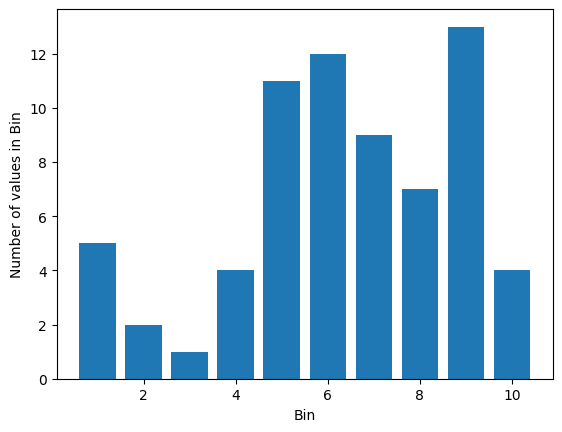

In [ ]:
plt.bar(counts.index.astype(int), counts.values)
plt.xlabel('Bin')
plt.ylabel('Number of values in Bin')
plt.show()

In [ ]:
def equi_width_range(arr, bins):
    np.sort(arr)
    arr_bin = []
    w = float((max(arr) - min(arr))/ bins)
    bin_range = []
    for i in range(bins + 1): # fine each point of bin's range
        bin_range = bin_range + [float(min(arr) + w*i)]
    print("Point of bin's range: ", bin_range)

    for i in range(bins):
        arr_temp = []
        for j in arr:
            if (j >= bin_range[i]) & (j <= bin_range[i+1]):
                arr_temp += [j]
    
        arr_bin += [arr_temp]
    return arr_bin, bin_range

In [ ]:
width_bin_2, width_bin_range = equi_width_range(data_tobin, 10)
width_bin_2

Point of bin's range:  [7.0, 13.8, 20.6, 27.4, 34.2, 41.0, 47.8, 54.6, 61.4, 68.19999999999999, 75.0]


[[7, 7, 7, 11, 13],
 [19, 19],
 [22],
 [32, 33, 33, 33],
 [35, 35, 36, 36, 36, 37, 37, 37, 38, 38, 38],
 [42, 43, 44, 44, 44, 45, 45, 45, 46, 47, 47, 47],
 [48, 50, 51, 53, 53, 54, 54, 54, 54],
 [56, 57, 59, 59, 59, 59, 61],
 [62, 62, 62, 62, 64, 64, 65, 66, 66, 66, 67, 68, 68],
 [69, 70, 73, 75]]

# Equi depth range

In [ ]:
cate_depth = pd.qcut(data_tobin, q=10, precision=1, labels=['1','2','3','4','5','6','7','8','9','10'])

In [ ]:
cate_depth

['1', '1', '1', '1', '1', ..., '10', '10', '10', '10', '10']
Length: 68
Categories (10, object): ['1' < '2' < '3' < '4' ... '7' < '8' < '9' < '10']

In [ ]:
counts = cate_depth.value_counts().sort_index()

In [ ]:
df_binned = pd.DataFrame({'value': data_tobin, 'bin': cate_depth})

for name, group in df_binned.groupby('bin'):
    print(f'Category {name} contains values: {list(group["value"])}')

Category 1 contains values: [7, 7, 7, 11, 13, 19, 19]
Category 2 contains values: [22, 32, 33, 33, 33, 35, 35]
Category 3 contains values: [36, 36, 36, 37, 37, 37, 38, 38, 38]
Category 4 contains values: [42, 43, 44, 44, 44]
Category 5 contains values: [45, 45, 45, 46, 47, 47, 47]
Category 6 contains values: [48, 50, 51, 53, 53, 54, 54, 54, 54]
Category 7 contains values: [56, 57, 59, 59, 59, 59]
Category 8 contains values: [61, 62, 62, 62, 62]
Category 9 contains values: [64, 64, 65, 66, 66, 66]
Category 10 contains values: [67, 68, 68, 69, 70, 73, 75]


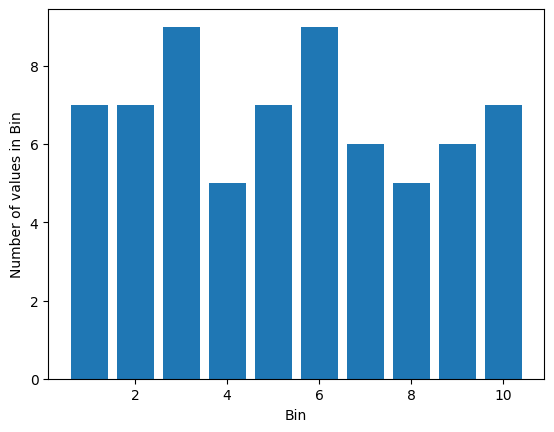

In [ ]:
plt.bar(counts.index.astype(int), counts.values)
plt.xlabel('Bin')
plt.ylabel('Number of values in Bin')
plt.show()

In [ ]:
def equi_depth_range(arr, bins):
    np.sort(arr)
    n = round(len(arr)/bins)
    arr_bin = []
    index = 0
    for i in range(bins):
        arr_temp = []
        for j in range(n):
            arr_temp += [arr[index]]
            index += 1
            if index >= len(arr):
                break
        arr_bin += [arr_temp]
    return arr_bin

In [ ]:
depth_bin_2 = equi_depth_range(data_tobin, 10)
depth_bin_2

[[7, 7, 7, 11, 13, 19, 19],
 [22, 32, 33, 33, 33, 35, 35],
 [36, 36, 36, 37, 37, 37, 38],
 [38, 38, 42, 43, 44, 44, 44],
 [45, 45, 45, 46, 47, 47, 47],
 [48, 50, 51, 53, 53, 54, 54],
 [54, 54, 56, 57, 59, 59, 59],
 [59, 61, 62, 62, 62, 62, 64],
 [64, 65, 66, 66, 66, 67, 68],
 [68, 69, 70, 73, 75]]

# PCA

## Load Data

In [ ]:
pip install unlzw3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/musk/clean2.data.Z'

In [ ]:
import urllib.request
import unlzw3

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/musk/clean2.data.Z'
filename = 'clean2.data'

# Download the compressed file
urllib.request.urlretrieve(url, filename + '.Z')

# Uncompress the file
with open(filename + '.Z', 'rb') as f_in:
    compressed_data = f_in.read()
    uncompressed_data = unlzw3.unlzw(compressed_data)

with open(filename, 'wb') as f_out:
    f_out.write(uncompressed_data)

In [ ]:
df = pd.read_csv('/content/clean2.data')

In [ ]:
print(df.shape)
df

(6597, 169)


,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,...,-308.1,52,-7,39,126,156,-50.1,-112,96,1.
0,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,...,-59,-2,52,103,136,169,-61,-136,79,1.0
1,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,...,-134,-154,57,143,142,165,-67,-145,39,1.0
2,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,136,168,-60,-135,80,1.0
3,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,...,-60,-4,52,104,137,168,-60,-135,80,1.0
4,MUSK-211,211_1+14,46,-194,-145,28,-117,72,57,-168,...,-138,-156,56,143,142,164,-67,-145,40,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
6593,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
6594,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,...,90,117,-8,150,130,159,-66,-144,-6,0.0
6595,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,...,86,99,-14,-31,106,171,-44,-116,117,0.0


## Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6597 entries, 0 to 6596
Columns: 169 entries, MUSK-211 to 1.
dtypes: float64(1), int64(166), object(2)
memory usage: 8.5+ MB


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
object_columns

Index(['MUSK-211', '211_1+1'], dtype='object')

In [ ]:
df[object_columns].value_counts()

MUSK-211       211_1+1  
MUSK-211       211_1+10     1
NON-MUSK-f146  f146_1+97    1
NON-MUSK-f161  f161_1+2     1
               f161_1+1     1
NON-MUSK-f150  f150_1+6     1
                           ..
NON-MUSK-251   251_2+30     1
               251_2+3      1
               251_2+29     1
               251_2+28     1
NON-MUSK-jp13  jp13_2+9     1
Length: 6597, dtype: int64

In [ ]:
df = df.drop(object_columns, axis = 1)

## Apply PCA

In [ ]:
pca = PCA(n_components = 2, random_state = 42)
#Select first 20 features to reduce dimension
X_pca = pca.fit_transform(df.iloc[:, :20])

# Report the eigenvectors and eigenvalues
print("Eigenvectors:\n", pca.components_)
print("\nEigenvalues:\n", pca.explained_variance_)

Eigenvectors:
 [[ 0.09192988 -0.15401448 -0.18546545  0.00172393  0.04893815 -0.02577116
   0.31247331 -0.3188652   0.31481833 -0.06039798 -0.33591374 -0.16985373
  -0.12007947 -0.36982161 -0.34123252 -0.0751674   0.31152285 -0.13523938
  -0.2120875  -0.2302463 ]
 [ 0.08178844  0.19448357  0.19657966 -0.30694307  0.01999052  0.13510483
  -0.3708247  -0.10694922 -0.34042268  0.22457038 -0.32382199 -0.25751451
  -0.05303895 -0.20404978 -0.23231395 -0.05821882 -0.39301095 -0.0776009
  -0.23157853 -0.04020607]]

Eigenvalues:
 [56732.98640455 38880.68207853]


In [ ]:
print(X_pca.shape)
X_pca

(6597, 2)


array([[ 410.06995342,   54.60603893],
       [ 396.42475524,   76.06666365],
       [ 410.29669051,   54.92842288],
       ...,
       [-225.52038769,  185.26609681],
       [-216.77963418,  187.39590007],
       [-233.35313424,  194.10992388]])

## Report

In [91]:
def PCA_function(X , num_components):
    """
        X là dữ liệu đầu vào, kích thước n x d
        num_components là số thành phần của giá trị đầu ra 
    """
    # Đầu tiên trừ mỗi giá trị với mean dữ liệu (hoặc áp dụng phân phối chuẩn)
    X_mean = X - np.mean(X , axis = 0)
     
    # Dùng hàm np.cov để tính ma trận hiệp phương sai, kích thước d x d
    cov_mat = np.cov(X_mean , rowvar = False)
     
    # Tính trị riêng, vector riêng bằng hàm np.linalg.eigh
    # Các vectơ riêng của ma trận Hiệp phương sai là ma trận trực giao, mỗi vector đại diện mỗi trục
    # Trị riêng đo lường lượng biến thiên được giữ lại bởi mỗi thành phần chính.
    # Trị riêng lớn đối với các Pricipal Component đầu tiên và nhỏ đối với các Pricipal Component tiếp theo. 
    # Tức là, các Pricipal Component đầu tiên tương ứng với các hướng có lượng biến thiên lớn nhất trong tập dữ liệu
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
     
    # Các trị riêng, vector riêng càng cao thì có độ biến thiên càng cao, nên sắp xếp theo thứ tự giảm dần
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]

    print("Eigenvectors:\n", sorted_eigenvectors)
    print("\nEigenvalues:\n", sorted_eigenvalue) 

    # Rồi chọn num_components trị riêng lớn nhất, ứng với mỗi trị riêng là vector riêng
    # Điều này giúp cực đại hóa phương sai dữ liệu. với các hàng là các vector riêng ứng với k trị riêng đã chọn ta tạo được ma trận U
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
     
    # Trả về dữ liệu đầu ra với kích thước n x num_components
    # kích thước tương ứng từng biến: n x num_components = ( (d x num_components).T * (n x d).T).T
    #                                                    = ( num_coponents x n ).T = n x num_components
    X_reduced = np.dot(eigenvector_subset.T , X_mean.T).T
     
    return X_reduced

In [92]:
X_pca = PCA_function(df.iloc[:,:20], 2)

Eigenvectors:
 [[-9.19298793e-02  8.17883823e-02 -9.77313974e-02  1.20534976e-01
  -1.25370628e-02  9.09221231e-02 -5.29796907e-02  2.47148876e-01
  -1.18316911e-01  6.05492237e-02 -3.36971098e-02  9.65088269e-02
  -2.68701389e-01  8.72968011e-01 -7.65287848e-02  1.25375667e-01
  -3.38925289e-02  9.36066468e-03 -2.41415797e-02 -5.17980506e-02]
 [ 1.54014479e-01  1.94483546e-01  2.56476485e-01 -7.73703321e-01
  -2.79192804e-01  2.86744901e-01  1.07291086e-01 -1.29537861e-01
  -1.00903996e-01  1.18865634e-02  5.98357259e-02  8.34212009e-03
  -8.11400008e-03  1.50974796e-01 -4.40760289e-02 -2.09719745e-01
  -5.02787643e-02  5.57603600e-03  1.01353122e-02 -1.33080088e-02]
 [ 1.85465454e-01  1.96579667e-01  7.36092319e-02 -1.45790682e-01
  -2.58027055e-02 -5.37165359e-02 -1.13177114e-02 -8.95157563e-02
  -9.06027104e-02 -5.28305697e-02  2.74643085e-03  3.62557317e-02
   7.99291769e-02 -5.09826604e-02  1.13722765e-02  9.15044213e-01
   1.68553736e-01  1.84463980e-02 -8.98896701e-03  3.188779

In [93]:
print(X_pca.shape)
X_pca

(6597, 2)


array([[-410.06993107,   54.60625502],
       [-396.42470111,   76.06703287],
       [-410.29666742,   54.92864098],
       ...,
       [ 225.52036202,  185.26604483],
       [ 216.77960661,  187.39582606],
       [ 233.35310676,  194.10984821]])